In [1]:
import sys
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.output_scroll { height: auto; max-height: 40ex; }</style>"))

# Global molecular properties 

In this tutorial we will learn how to extract global molecular properties such as reaccion energies
or chemical potential using the Kudi reactio path library. We will start by importing the Path
class from the kudi library, and create a reaction path object from the output file which contains 
single point computation along the reaction path.

In [2]:
from kudi import Path

Mol = Path("output_sp.dat")

Obtaining the single point blocks....
Got it!
----------------------------------------------------------


In this tutorial we will study the symmetric Sn2 reaction of flouromethane. To visulize the reaction we can extract
the xyz coordinates from the reaccion object *Mol*, using the *saveXYZ* method. This will save the xyz coordinates
of the reacction in a format that is readable to the [Molden program](http://www.cmbi.ru.nl/molden/). 

In [3]:
Mol.saveXYZ(format_="molden")

Saving XYZ info in molden format
----------------------------------------------------------


In [4]:
from IPython.display import HTML
HTML('<img src="./movie2.gif">')

Now we proceed to extract the reaction energy. This is fairly straigtforward as it can be done in one line using the
energy method:

In [5]:
enrg = Mol.energy()

*enrg* is a [python dictionary](https://www.w3schools.com/python/python_dictionaries.asp)  that holds to items,
one it the reaction energy which has the key "Energy", whose values are a [python list](https://www.w3schools.com/python/python_lists.asp) of the realtive reaction energies, the other item is the reaction coordinate which has the 
key "Reaction Coordinate" and holds a list with the all the reacction coordinates. To ilustrate the structure 
of *enrg* we can loop through the keys and values:

In [6]:
for key in enrg.keys():
    print(key)


Reaction Coordinate
Energy


In [7]:
for val in enrg.values():
    print(val)
    print('---------------------------------------')

[-2.97381, -2.903, -2.83218, -2.76137, -2.69056, -2.61975, -2.54894, -2.47815, -2.40737, -2.3366, -2.26584, -2.19508, -2.1243, -2.05352, -1.98273, -1.91193, -1.84112, -1.77032, -1.6995, -1.62869, -1.55788, -1.48707, -1.41625, -1.34544, -1.27463, -1.20381, -1.133, -1.06219, -0.99137, -0.92056, -0.84975, -0.77893, -0.70812, -0.63731, -0.5665, -0.49568, -0.42487, -0.35406, -0.28325, -0.21244, -0.14163, -0.07083, 0.0, 0.07083, 0.14163, 0.21244, 0.28325, 0.35406, 0.42487, 0.49568, 0.5665, 0.63731, 0.70812, 0.77893, 0.84975, 0.92056, 0.99137, 1.06219, 1.133, 1.20381, 1.27463, 1.34544, 1.41625, 1.48707, 1.55788, 1.62869, 1.6995, 1.77032, 1.84112, 1.91193, 1.98273, 2.05352, 2.1243, 2.19508, 2.26584, 2.3366, 2.40737, 2.47815, 2.54894, 2.61975, 2.69056, 2.76137, 2.83218, 2.903, 2.97381]
---------------------------------------
[0.0, 0.08606543372064882, 0.17920164412555942, 0.27964394729176506, 0.38767974253080134, 0.5036215295707104, 0.6279236252600513, 0.7612405219912449, 0.9046829114959348, 1.

The first array here corresponds to the reaction coordiante while the second is the reaction energy. Now we can proceed to construct the plot. Kudi has several matplotlib wrapper functions to plot properties along a reaction coordinate, which are highly custumizable. We will use the *savePlot* function to construct a simple energy plot from the *enrg*
dictionary. 

Generating the plot with the savePlot...
Saving the plot in ./figures as energy.svg
----------------------------------------------------------


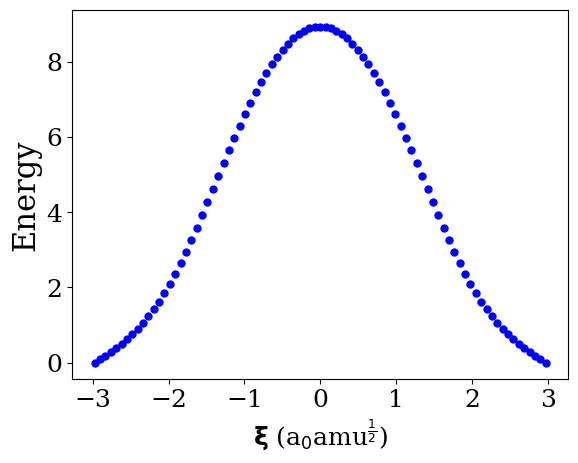

<Figure size 640x480 with 0 Axes>

In [8]:
Mol.savePlot("energy.svg", "Energy", show = True, **enrg)

There are several things that can be costumized e.g. bullet type/color, y-axis limits,...

Generating the plot with the savePlot...
Saving the plot in ./figures as energy.svg
----------------------------------------------------------


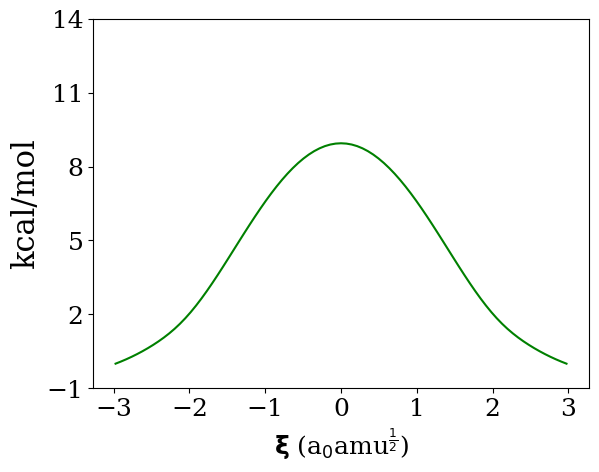

<Figure size 640x480 with 0 Axes>

In [9]:
Mol.savePlot("energy.svg", 'kcal/mol', limit_list=[-1,15],  bullets=['g-'], yspacing = 3.0, show = True,  **enrg)

If you want to use another plotting suite or a different data proccesing library like [Pandas](https://pandas.pydata.org/), you can export the data contained in the *enrg* or any Kudi dictionary
to a cvs file:

In [10]:
Mol.save('energy.dat',**enrg)

Saving the data in: energy.dat
----------------------------------------------------------


We can further analyze the the energetics of this reaction by obtaining the derivative of the energy profile,
the so called **reaction force**:

$$
F(\xi) = -\frac{dE}{d\xi}
$$

Generating the plot with the savePlot...
Saving the plot in ./figures as force.svg
----------------------------------------------------------


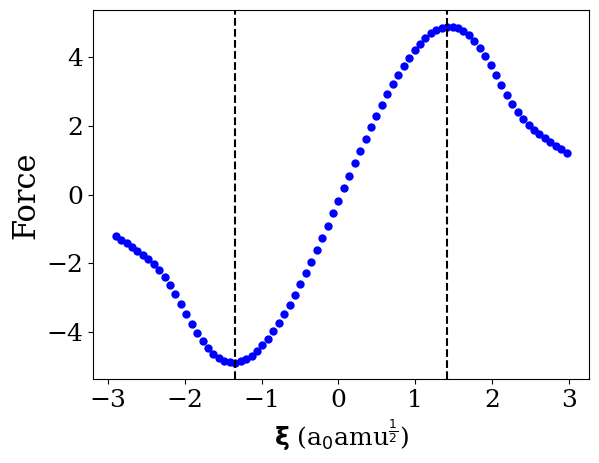

<Figure size 640x480 with 0 Axes>

In [11]:
force = Mol.force() 
Mol.savePlot("force.svg", "Force", show = True, work=True, **force)

The reaction works within the four regions delimited by the transition state and the extrema of 
the reaction force profile can also be computed with kudi, and saved as a text file or a latex
table in the folder *data*.

In [12]:
Mol.ReactionWorks(format_='latex')

(4.75, 4.15, -4.15, -4.75, -1.34544, 1.41625)

Now that we have sucesfully plotted the reaction energy, we can proceed to plot other global properties of 
this reaction like the chemical potential. 

Generating the plot with the savePlot...
Saving the plot in ./figures as chempot.svg
----------------------------------------------------------


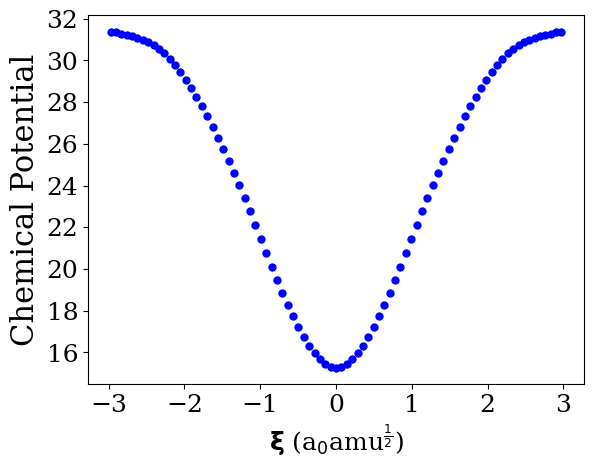

<Figure size 640x480 with 0 Axes>

In [13]:
chemPot = Mol.chemPotKoopman()
Mol.savePlot("chempot.svg", "Chemical Potential", show=True, **chemPot)

Finally to get a better insight into the change in the electron density along a reaction path, we will
plot the reaction electronic flux (REF), which is a niffty indicator of the electron localization/delocalization
processes along a chemical reaction. It is defiend as :

$$
J(\xi) = -\frac{d\mu}{d\xi}
$$

Where $\mu$ is the electronic chemical potential we just plotted. A negative chemical potential is associated 
with electron localization while a positve value means that electron density delocalization processes is 
predominant. 

Generating the plot with the savePlot...
Saving the plot in ./figures as flux.svg
----------------------------------------------------------


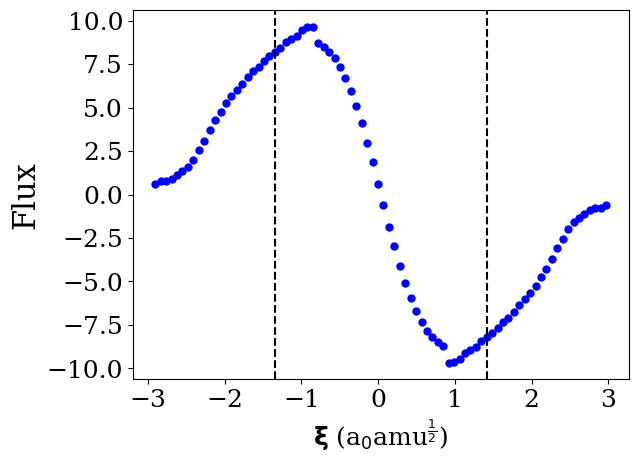

<Figure size 640x480 with 0 Axes>

In [14]:
flux = Mol.flux(chemPot)
Mol.savePlot("flux.svg", "Flux", show=True, work=True, **flux)

We can see that going towards the transition state, the electron density delocalizes across the supermolecule, while 
passed the TS the electron density is localized to its original state, as to be expected from a symmetric Sn2 reaction. Note that for the definition of the *flux* dictionary it is necessary to specify a chemical potential variable. This is necessary
since the chemical potential can also be computed using finite differences. This can also be done with Kudi and will be ilustrated in a future tutorial. 

#### Have fun exploring chemical reactions with Kudi, and let me know of any bugs that you might encounter.